<a href="https://colab.research.google.com/github/ambroz72/Data-Analytics---BSBI/blob/master/simple_mushroom_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("mushrooms.csv")

# Count the proportion of edible and poisonous mushrooms
class_counts = df['class'].value_counts(normalize=True)
p1, p2 = class_counts.iloc[0], class_counts.iloc[1]

# Compute entropy
entropy = - (p1 * np.log2(p1) + p2 * np.log2(p2))
print("Entropy of the dataset:", entropy)


Entropy of the dataset: 0.9990678968724603


In [2]:
def entropy(subset):
    """Calculate entropy for a given subset."""
    counts = subset.value_counts(normalize=True)
    return -sum(counts * np.log2(counts))

# Overall entropy
H_D = entropy(df['class'])

# Compute entropy after splitting on cap-color
cap_color_groups = df.groupby('cap-color')['class']
weighted_entropy = sum((len(group)/len(df) * entropy(group)) for _, group in cap_color_groups)

# Information Gain
info_gain = H_D - weighted_entropy
print("Information Gain of Cap-Color:", info_gain)


Information Gain of Cap-Color: 0.03604928297620391


In [3]:
attributes = [col for col in df.columns if col not in ['class', 'cap-color']]

info_gains = {}
for attr in attributes:
    attr_groups = df.groupby(attr)['class']
    weighted_entropy = sum((len(group)/len(df) * entropy(group)) for _, group in attr_groups)
    info_gains[attr] = H_D - weighted_entropy

# Find attribute with max information gain
best_next_attr = max(info_gains, key=info_gains.get)
print("Next best attribute after Cap-Color:", best_next_attr)


Next best attribute after Cap-Color: odor


In [4]:
misclassification_rate = min(p1, p2)
print("Expected Misclassification Rate:", misclassification_rate)


Expected Misclassification Rate: 0.48202855736090594


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display summary statistics
print(df.describe(include='all'))


       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

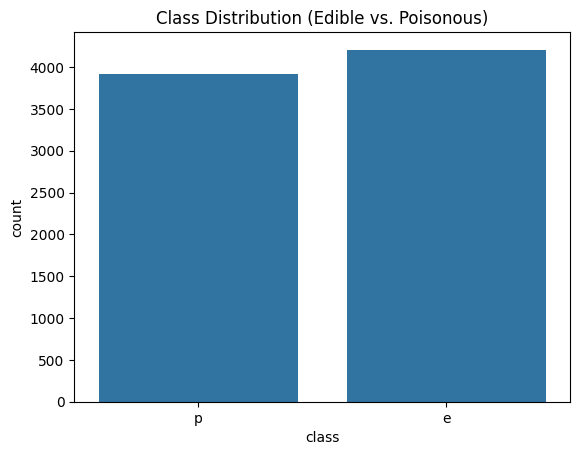

In [7]:
# Plot class distribution
sns.countplot(x='class', data=df)
plt.title("Class Distribution (Edible vs. Poisonous)")
plt.show()



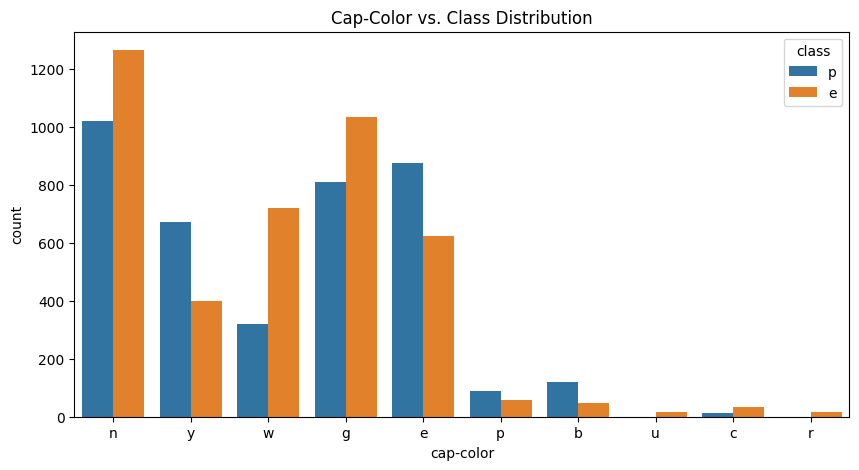

In [8]:
# Visualize cap-color distribution by class
plt.figure(figsize=(10, 5))
sns.countplot(x='cap-color', hue='class', data=df)
plt.title("Cap-Color vs. Class Distribution")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
df_encoded = df.apply(LabelEncoder().fit_transform)

# Define features and target
X = df_encoded.drop(columns=['class'])
y = df_encoded['class']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of models
models = {
    "GaussianNB": GaussianNB(),
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

# Train & evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

# Display results
pd.DataFrame(results).T


,Accuracy,Precision,Recall,F1-score
GaussianNB,0.921846,0.909887,0.929668,0.919671
RandomForest,1.000000,1.000000,1.000000,1.000000
DecisionTree,1.000000,1.000000,1.000000,1.000000
LogisticRegression,0.947692,0.943949,0.947570,0.945756
SVC,0.992615,0.998705,0.985934,0.992278
KNN,0.996308,0.992386,1.000000,0.996178
XGBoost,1.000000,1.000000,1.000000,1.000000


In [11]:
best_model = max(results, key=lambda k: results[k]['F1-score'])
print("Best performing model:", best_model)


Best performing model: RandomForest
